# Цель проекта

Разработать экспертную систему, использующей вероятностный подход к распознаванию, которая обеспечивает рекомендации по выбору ресторана.

Цель экспертной системы - на основании полученных данных о распознаваемом объекте сделать вывод о его принадлежности к известному системе классу.

# Результаты проекта

Пользовательский интерфейс:

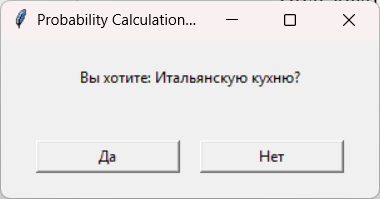

При нажатии на кнопки да или нет, происходит смена вопроса.
После ответа на все вопросы всплывает окно с результатами работы экспертной системы:

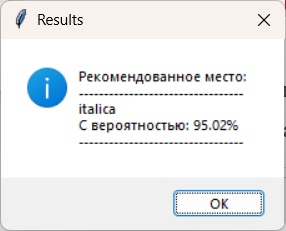

При нажатии на клавишу ок программа начинает цикл заново. Выход из программы осуществляется нажатием на крестик.
Если остался один диагноз для вывода и вероятность $p(Wj)$ - низкая, то выводится следующее окно:

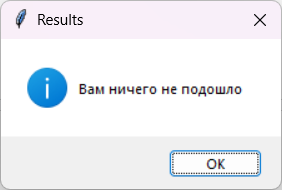

Если, в конце программы, рассчитанная вероятность каждого диагноза меньше 90%, то выводится пять самых вероятных диагнозов:

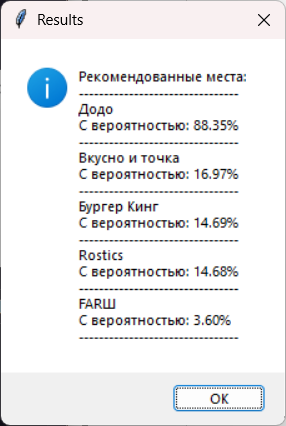

Данная экспертная система принимает правдоподобные решения, обеспечивая стабильную работу и вывод соответствующих рекомендаций.

# База данных экспертной системы

База данных организована в виде таблицы, где в столбцах представлены наименования ресторанов (диагнозы).

В первой строке указана априорная вероятность выбора. Сумма вероятностей по всем диагнозам в этой строке равна единице.

В последующих строках таблицы указаны названия вопросов (симптомы) и вероятности для каждого диагноза, представленные вформате $[p(X_i/W_j), p(X_i/noW_j)]$.

Выбор априорных вероятностей $p_a(Wj)$ – происходил по приблизительным эмпирическим подсчетам соответствия данного симптома к данному диагнозу.


Расчет вероятностей $p(Xi/noWj)$, для диагнозов, которые содержат данный симптом происходил по следующей формуле:
$$ py\left(\frac{Wj}{noXiy}\right)=\frac{Xiy-1}{Xi-1} $$
Для диагнозов, которые не содержат данный симптом:
$$ pn\left(\frac{Wj}{noXin}\right)=\frac{Xiy}{Xi-1} $$
Где: 

$Xiy$ – количество диагнозов, содержащих данный симптом;

$Xi$ – количество всех диагнозов.

In [13]:
import pandas as pd

In [14]:
df = pd.read_excel(open('tab1.xlsx', 'rb'))
for column in df.columns[1:]:
    df[column] = df[column].apply(eval)
df.set_index('Unnamed: 0', inplace=True)
df.index.name = None
df.head()

,Пицца 22 см,Додо,Krang Pizza,Gianni,italica,Ярумен,Такояки,Кореана,ОгоХого,Kimchi To Go,...,Бургер Кинг,Вкусно и точка,Rostics,FARШ,Мясная лавка,Beer House,Неканон,Контакт-бар,Ипполит,Frank
pa(Wj),0.04,0.055,0.045,0.02,0.03,0.055,0.045,0.045,0.04,0.055,...,0.065,0.065,0.065,0.055,0.03,0.045,0.045,0.05,0.065,0.045
Итальянскую кухню,"[0.85, 0.2]","[0.7, 0.2]","[0.8, 0.2]","[0.9, 0.2]","[0.9, 0.2]","[0.01, 0.25]","[0.01, 0.25]","[0.01, 0.25]","[0.01, 0.25]","[0.01, 0.25]",...,"[0.05, 0.25]","[0.01, 0.25]","[0.01, 0.25]","[0.05, 0.25]","[0.01, 0.25]","[0.01, 0.25]","[0.01, 0.25]","[0.1, 0.25]","[0.01, 0.25]","[0.01, 0.25]"
Японскую кухню,"[0.01, 0.2]","[0.01, 0.2]","[0.01, 0.2]","[0.01, 0.2]","[0.01, 0.2]","[0.95, 0.15]","[0.9, 0.15]","[0.2, 0.15]","[0.01, 0.2]","[0.01, 0.2]",...,"[0.01, 0.2]","[0.01, 0.2]","[0.01, 0.2]","[0.01, 0.2]","[0.01, 0.2]","[0.01, 0.2]","[0.01, 0.2]","[0.16, 0.15]","[0.01, 0.2]","[0.01, 0.2]"
Китайскую кухню,"[0.01, 0.1]","[0.01, 0.1]","[0.01, 0.1]","[0.01, 0.1]","[0.01, 0.1]","[0.05, 0.1]","[0.05, 0.1]","[0.15, 0.05]","[0.95, 0.05]","[0.05, 0.1]",...,"[0.01, 0.1]","[0.01, 0.1]","[0.01, 0.1]","[0.01, 0.1]","[0.01, 0.1]","[0.01, 0.1]","[0.01, 0.1]","[0.01, 0.1]","[0.01, 0.1]","[0.01, 0.1]"
Корейскую кухню,"[0.01, 0.2]","[0.01, 0.2]","[0.01, 0.2]","[0.01, 0.2]","[0.01, 0.2]","[0.05, 0.2]","[0.05, 0.2]","[0.95, 0.15]","[0.05, 0.2]","[0.95, 0.15]",...,"[0.01, 0.2]","[0.01, 0.2]","[0.01, 0.2]","[0.01, 0.2]","[0.01, 0.2]","[0.01, 0.2]","[0.01, 0.2]","[0.14, 0.15]","[0.01, 0.2]","[0.01, 0.2]"


In [15]:
import tkinter as tk
from tkinter import messagebox

# Реализация экспертной системы

Алгоритм работы экспертной системы является циклическим. В каждом цикле анализируется один симптом. Для этого выполняется следующая последовательность шагов:
- Выбирается наиболее информативный симптом и задается соответствующий ему вопрос;
- Полученный ответ используется для высчиления вероятностей диагнозов, а вопрос (симптом) больше не задается;
- По результатам вычисления некоторые диагнозы могут исключаться из дальнейшего рассмотрения;
- Если вероятность какого-то диагноза достаточна для принятия решения, то система заканчивает работу, если нет - то цикл повторяется.

Вначале система задает вопрос. Получив ответ на заданный вопрос, необходимо использовать его для вычисления вероятностей диагнозов, в описании которых он присутствует. При этом подтверждать диагноз может как положительный, так и отрицательный ответ. Для вычисления вероятности диагноза при наличии данного симптома (ответ **"да"**) используется формула Байеса:
$$ p(Wj/Xi) = \dfrac{p(Wj) \cdot p(Xi/Wj)}{p(Wj) \cdot p(Xi/Wj) + (1-p(Wj)) \cdot p(Xi/noWj)}$$

где: 
$p(Wj) -$ вероятность диагноза $Wj$ на текущем шаге. 

До получения ответа на первый вопрос $p(Wj) = p_a(Wj)$, а после обработки ответа на $i$-й вопрос можно считать $p(Wi) = p(Wi/Xj)$.

При ответе **"нет"**:
$$ p(Wj/Xi) = \dfrac{p(Wj) \cdot (1 - p(Xi/Wj))}{p(Wj) \cdot (1 - p(Xi/Wj)) + (1-p(Wj)) \cdot (1 - p(Xi/noWj))}$$

Если вероятность $p(Wj/Xi)$, вычисленная по формулам выше, близка к нулю, то $j$-й диагноз исключается из дальнейшего рассмотрения.

In [16]:
def calaculate_bayes_positive(p_Wj, P_Xi_Wj, P_Xi_noWj):
    return (p_Wj * P_Xi_Wj) / ((p_Wj * P_Xi_Wj) + ((1 - p_Wj) * P_Xi_noWj) + 1e-20)

def calaculate_bayes_negative(p_Wj, P_Xi_Wj, P_Xi_noWj):
    return (p_Wj * (1 - P_Xi_Wj)) / ((p_Wj * (1 - P_Xi_Wj)) + ((1 - p_Wj) * (1 - P_Xi_noWj)) + 1e-20)

После того как будут пересчитаны вероятности всех диагнозов, в описании которых используется симптом, связанный с заданным вопросом, необходимо для каждого из этих диагнозов оценить возможные максимальную и минимальную вероятности. Для этого у каждого диагноза просматривается список еще не рассмотренных симптомов и по каждому из них выполняется следующая последовательность действий (при первом цикле эта последовательность выполняется для всех диагнозов).

Во-перых, необходимо определить какой ответ - положительный или отрицательный, увеличивает вероятность $j$-го диагноза. 

Если $p(Xi/Wj) > p(Xi/noWj)$, то положительный ответ увеличивает $p(Wj/Xi)$ и при оценке возможных вероятностей диагноза расчетные условные вероятности $p'(Xi/Wj)$ и $p'(Xi/noWj)$ не изменяются, т.е. 
$$ p'(Xi/Wj)=p(Xi/Wj) $$
$$ p'(Xi/noWj) = p(Xi/noWj) $$

Если же $p(Xi/Wj) < p(Xi/noWj)$, то $p(Wj/Xi)$ увеличивается при отрицательном ответе и для оценки следует исполльозвать обратные значения условных венроятностей, т.е. считать
$$ p'(Xi/Wj)=1 - p(Xi/Wj) $$
$$ p'(Xi/noWj) =1 -  p(Xi/noWj) $$


Входные параметры:

`lst` — список вероятностей.

`num_elem` — индекс элемента $p(Xi/Wj)$ или $p(Xi/noWj)$, который нужно обработать.

`sign` — знак обработки (`'positive'` или `'negative'`).

In [17]:
#Method
def process_element(lst, num_elem, sign):
    element = lst[num_elem]
    if sign == 'positive' and num_elem == 0:
        element = 1 - element if element < lst[1] else element
    elif sign == 'positive' and num_elem == 1:
        element = 1 - element if element < lst[0] else element
    elif sign == 'negative'and num_elem == 0:
        element = 1 - element if element > lst[1] else element
    elif sign == 'negative'and num_elem == 1:
        element = 1 - element if element > lst[0] else element
    return element

Во-вторых вычисляются четыре условные вероятности для не рассмотренных симптомов, согласно формулам ниже:
- Вероятнотсь $j$-го диагноза при всех положительных ответах:
$$ p(Wj/X_П) = \prod_{i=1}^m p'(Xi/Wj) $$

- Вероятнотсь не $j$-го диагноза при всех положительных ответах:
$$ p(noWj/X_П) = \prod_{i=1}^m p'(Xi/noWj) $$

- Вероятнотсь $j$-го диагноза при всех отрицательных ответах:
$$ p(Wj/noX_П) = \prod_{i=1}^m (1 - p'(Xi/Wj)) $$

- Вероятнотсь не $j$-го диагноза при всех отрицательных ответах:
$$ p(noWj/noX_П) = \prod_{i=1}^m (1 - p'(Xi/noWj)) $$

Вычисление каждой отдельной вероятности реализовано в функции `prob_calculation` и добавление их в новый DataFrame.

Входные параметры:

`method` — функция, используемая для обработки элементов (`process_element`).

`result_dtfr` — DataFrame с текущими результатами.

`orig_data` — исходные данные (таблица вероятностей).

`name_string` — название строки в новом DataFrame.

`num_elem` — индекс элемента в массиве вероятностей (0 или 1).

`sign` — знак (`'positive'` или `'negative'`).

In [18]:
def prob_calculation(method, result_dtfr, orig_data, name_string, num_elem, sign):
    result_data = {}
    for column in orig_data.columns:
        processed_values = orig_data[column][1:].apply(method, args=(num_elem, sign))
        product = processed_values.prod()  # Перемножаем все значения
        result_data[column] = [product]
        
    result_df = pd.concat([result_dtfr, pd.DataFrame(result_data, index=[name_string])], ignore_index=False)
    return result_df

В-третьих, используя результаты вычисления условных вероятностей, по формуле Байеса определяются максимально возможная вероятность $i$-го диагноза:
$$ p_{max}(Wj) = \dfrac{p(Wj) \cdot p(Wj/X_П)}{p(Wj) \cdot p(Wj/X_П) + (1-p(Wj)) \cdot p(noWj/X_П)} $$
и минимально возможная вероятность $i$-го диагноза:
$$ p_{min}(Wj) = \dfrac{p(Wj) \cdot p(Wj/noX_П)}{p(Wj) \cdot p(Wj/noX_П) + (1-p(Wj)) \cdot p(noWj/noX_П)} $$

In [19]:
def calculate_pmax(pa_Wj, P_Wj_Xp, P_noWj_Xp):
    return (pa_Wj * P_Wj_Xp) / ((pa_Wj * P_Wj_Xp) + ((1 - pa_Wj) * P_noWj_Xp))

def calculate_pmin(pa_Wj, P_Wj_noXp, P_noWj_noXp):
    return (pa_Wj * P_Wj_noXp) / ((pa_Wj * P_Wj_noXp) + ((1 - pa_Wj) * P_noWj_noXp))

Если $p_{max} < p(Wj)$, то $j$-й диагноз исключается из дальнейшего рассмотрения, т.к. его максимально возможная вероятность при всех положительных симптомах меньше вероятности наличия данного диагноза у объекта до получения каких-либо данных о еще не рассмотренных симптомах.

## Реализация пользовательского интерфейса и основного цикла программы

In [25]:
class ProbabilityApp:
    def __init__(self, root):
        """
        Инициализация графического интерфейса и загрузка данных.

        Параметры:
        root (tk.Tk): Главное окно приложения.
        """
        self.root = root
        self.root.title("Probability Calculation App")

        # Загрузка данных из файла
        self.df = pd.read_excel(open('tab1.xlsx', 'rb'))
        for column in self.df.columns[1:]:
            self.df[column] = self.df[column].apply(eval)
        self.df.set_index('Unnamed: 0', inplace=True)
        self.df.index.name = None

        # Создание копий данных и инициализация первой строки
        self.df_copy = self.df.copy()
        self.iter_df = self.df.iloc[0:1]
        self.iter_df.rename(index={'pa(Wj)': 'p(Wj)'}, inplace=True)
        self.iter_df = self.calculate_rest_prob(self.iter_df, self.df)

        self.question_index = 1 # Индекс текущего вопроса

        # Создание элементов интерфейса
        self.question_label = tk.Label(root, text="")
        self.question_label.pack(pady=20)

        self.button_frame = tk.Frame(root)
        self.button_frame.pack(side=tk.TOP, anchor='n', padx=20, pady=20)

        self.yes_button = tk.Button(self.button_frame, text="Да", command=lambda: self.answer_question("да"), width=15)
        self.yes_button.pack(side=tk.LEFT, padx=8)

        self.no_button = tk.Button(self.button_frame, text="Нет", command=lambda: self.answer_question("нет"), width=15)
        self.no_button.pack(side=tk.RIGHT, padx=8)

        self.update_question() # Вывод первого вопроса

    def reset(self):
        """
        Сбрасывает данные и интерфейс к начальному состоянию.
        """
        self.df_copy = self.df.copy()
        self.iter_df = self.df.iloc[0:1]
        self.iter_df.rename(index={'pa(Wj)': 'p(Wj)'}, inplace=True)
        self.iter_df = self.calculate_rest_prob(self.iter_df, self.df)
        self.question_index = 1
        self.update_question()

    def update_question(self):
        """
        Обновляет текст вопроса в интерфейсе.

        Если вопросы ещё есть, выводит следующий. Если вопросов нет, показывает результаты.
        """
        if self.df_copy.shape[0] > 1:
            self.question_label.config(text=f"Вы хотите: {self.df_copy.iloc[self.question_index].name}?")
        else:
            self.display_results()

    def answer_question(self, answer):
        """
        Обрабатывает ответ пользователя на вопрос.

        Параметры:
        answer (str): Ответ пользователя - "да" или "нет".
        """
        sign = "positive" if answer == "да" else "negative"

        row_name = self.df_copy.iloc[self.question_index].name
        self.iter_df = self.calculate_row_to_df(row_name, self.iter_df, self.df_copy, sign)
        self.df_copy = self.df_copy.drop(row_name)

        # Удаление колонок с вероятностью p(Wj) ≤ 0.0001
        for col in self.iter_df.columns:
            p_Wj_value = self.iter_df.at['p(Wj)', col]
            if p_Wj_value <= 0.0001 and self.df_copy.shape[1] > 1:
                self.iter_df.drop(columns=[col], inplace=True)
                self.df_copy.drop(columns=[col], inplace=True)

        self.iter_df = self.calculate_rest_prob(self.iter_df, self.df_copy)

        # Пересчёт вероятностей и удаление нерелевантных колонок
        for col in self.iter_df.columns:
            p_Wj_value = self.iter_df.at['p(Wj)', col]
            p_max = self.iter_df.at['pmax(Wj)', col]
            if p_max < p_Wj_value:
                self.iter_df.drop(columns=[col], inplace=True)
                self.df_copy.drop(columns=[col], inplace=True)

        self.update_question() # Обновить вопрос

    def display_results(self):
        """
        Выводит результаты пользователю.

        Если есть вариант с вероятностью ≥ 90% или остался только один вариант, он отображается как финальный.
        В противном случае выводятся 5 лучших вариантов или ничего.
        """
        self.iter_df = self.iter_df.sort_values(by='p(Wj)', axis=1, ascending=False)
        result_text = ""
        flag = False

        for col in self.iter_df.columns:
            p_Wj_value = self.iter_df.at['p(Wj)', col]
            if p_Wj_value < 0.0001 and self.df_copy.shape[1] == 1:
                result_text += f'Вам ничего не подошло'
            elif p_Wj_value >= 0.9 or self.df_copy.shape[1] == 1:
                result_text += f'Рекомендованное место:\n---------------------------------\n{col}\nС вероятностью: {p_Wj_value * 100:.2f}%\n---------------------------------\n'
                flag = True
                break
            else:
                if not flag:
                    result_text += f'Рекомендованные места:\n--------------------------------\n'
                    for i, col in enumerate(self.iter_df.columns):
                        if i >= 5:
                            break
                        p_Wj_value = self.iter_df.at['p(Wj)', col]
                        result_text += f'{col}\nС вероятностью: {p_Wj_value * 100:.2f}%\n--------------------------------\n'
                    flag = False
                break
            
        messagebox.showinfo("Results", result_text)
        self.reset()

    def calculate_rest_prob(self, result_df, orig_df):
        """
        Пересчитывает вероятности p(Wj) с использованием дополнительных вычислений.

        Параметры:
        result_df (pd.DataFrame): Текущая таблица с вероятностями.
        orig_df (pd.DataFrame): Исходные данные.

        Возвращает:
        pd.DataFrame: Обновлённая таблица вероятностей.
        """
        iter_df = prob_calculation(process_element, result_df, orig_df, 'P(Wj/Xп)', 0, 'positive')
        iter_df = prob_calculation(process_element, iter_df, orig_df, 'P(noWj/Xп)', 1, 'negative')
        iter_df = prob_calculation(process_element, iter_df, orig_df, 'P(Wj/noXп)', 0, 'negative')
        iter_df = prob_calculation(process_element, iter_df, orig_df, 'P(noWj/noXп)', 1, 'positive')
        iter_df.loc['pmax(Wj)'] = iter_df.apply(lambda col: calculate_pmax(col['p(Wj)'], col['P(Wj/Xп)'], col['P(noWj/Xп)']), axis=0)
        iter_df.loc['pmin(Wj)'] = iter_df.apply(lambda col: calculate_pmin(col['p(Wj)'], col['P(Wj/noXп)'], col['P(noWj/noXп)']), axis=0)
        return iter_df

    def calculate_row_to_df(self, row_name, iter_df, df_copy, sign):
        """
        Обновляет вероятности p(Wj) на основе ответа пользователя.

        Параметры:
        row_name (str): Название строки (вопроса), на который был дан ответ.
        iter_df (pd.DataFrame): Текущая таблица вероятностей.
        df_copy (pd.DataFrame): Копия исходных данных.
        sign (str): "positive" (если ответ "да") или "negative" (если ответ "нет").

        Возвращает:
        pd.DataFrame: Обновлённая таблица вероятностей.
        """
        results = {}
        for col in df_copy.columns:
            p_Wj_value = iter_df.at['p(Wj)', col]
            vector = df_copy.at[row_name, col]
            P_Xi_Wj = vector[0]
            P_Xi_noWj = vector[1]
            if sign == 'positive':
                results[col] = calaculate_bayes_positive(p_Wj_value, P_Xi_Wj, P_Xi_noWj)
            elif sign == 'negative':
                results[col] = calaculate_bayes_negative(p_Wj_value, P_Xi_Wj, P_Xi_noWj)
        iter_df = pd.DataFrame(results, index=['p(Wj)'])
        return iter_df

root = tk.Tk()
app = ProbabilityApp(root)
root.mainloop()

C:\Users\malze\AppData\Local\Temp\ipykernel_18512\2878712821.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.iter_df.rename(index={'pa(Wj)': 'p(Wj)'}, inplace=True)
C:\Users\malze\AppData\Local\Temp\ipykernel_18512\2878712821.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.iter_df.rename(index={'pa(Wj)': 'p(Wj)'}, inplace=True)
C:\Users\malze\AppData\Local\Temp\ipykernel_18512\2878712821.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returnin